# Project Title:
## ML4Impact: Predicting Customer Purchase Behavior for Socially-Informed Retail Optimization

---

## Objective

The objective of this project is to design and implement a supervised machine learning pipeline to predict customer purchase behavior (total amount spent) using real-world retail data. The model aims to:

- Identify the key features that influence purchase value.
- Enable retailers to anticipate high-value transactions.
- Offer insights to support inclusive and sustainable economic strategies (e.g., targeted offers to low-income groups or stock planning in underserved areas).

This project is part of the DSAI 3201 - Machine Learning (Spring 2025) group assignment titled ML4Impact, where students apply ML techniques to solve real-world problems with social or environmental relevance.

---

## Data Sources

The dataset `merged_data.csv` used in this project was derived from three sources:

1. **Customer Information Dataset**
   - Includes `customer_id`, `age`, `gender`, `date_of_birth`, `signup_date`, and customer demographics.
2. **Product Information Dataset**
   - Contains `product_id`, `category`, `brand`, and `price_per_unit`.
3. **Transaction Dataset**
   - Includes `transaction_id`, `product_name`, `quantity`, `total_amount`, and `transaction_date`.

These datasets were merged and preprocessed to construct a unified customer-product-transaction table for predictive modeling. The final dataset contains both categorical and numerical features.

---

## Workflow Summary

The overall project follows the standard ML pipeline, structured across the three project phases:

### 1. Data Preprocessing & Exploration

- Merged datasets and handled null/missing values.
- Dropped redundant or datetime fields (`signup_date`, `date_of_birth`).
- Applied label encoding for categorical features.
- Created new features (e.g., `quantity_to_price_ratio`).
- Conducted Exploratory Data Analysis (EDA) using histograms, bar plots, and heatmaps to identify patterns and outliers.

### 2. Feature Engineering & Selection

- Applied Principal Component Analysis (PCA) to reduce dimensionality and visualize explained variance.
- Used Forward and Backward Selection to identify the most relevant predictors.
- Implemented Lasso (L1) Regularization for feature shrinkage and model simplification.

### 3. Model Training & Evaluation

- Trained 3 supervised learning models:
  - Logistic Regression
  - Decision Tree Classifier
  - Support Vector Machine (SVM)

- Evaluation Metrics:
  - Accuracy
  - Precision
  - Recall
  - F1-Score

- Used Stratified K-Fold Cross-Validation for robust performance evaluation.
- Fine-tuned logistic regression using GridSearchCV to optimize hyperparameters (`C`, `solver`).

### 4. Interpretability and Insights

- Applied SHAP (SHapley Additive exPlanations):
  - Visualized global feature importance with `shap.plots.bar`.
  - Explained individual predictions with SHAP waterfall and force plots.

These techniques enhanced the interpretability and transparency of the final ML models, which is essential for socially responsible AI systems.

---

## Outcome & Key Insights

- Best-performing model: SVM with the highest F1-score ≈ 0.75, balancing precision and recall effectively.
- Top Predictive Features:
  - `quantity`
  - `price_per_unit`
  - `quantity_to_price_ratio`
  - Encoded `product_name` and `category`

- SHAP values clearly highlighted:
  - Larger quantity-to-price ratios significantly increase the chance of high purchase value.
  - Some product categories contribute negatively, implying low engagement or cheaper items.

---

## Social Impact Relevance

This predictive model could help retailers in:

- Promoting affordable product bundles for vulnerable customer segments.
- Forecasting demand to reduce overstock and minimize food/waste product loss.
- Enhancing inclusive marketing by targeting products where price-to-value matters most.


## 1. Data Import, Cleaning & Preprocessing

We begin by importing the customer, product, and purchase datasets. We will inspect the structure, check for missing values, handle duplicates, and clean the data for merging and analysis.


In [3]:
# Import required libraries
import pandas as pd
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer

# Load datasets
customer_df = pd.read_csv("customer_profile_dataset.csv")
product_df = pd.read_csv("products_dataset.csv")
purchase_df = pd.read_csv("purchase_history_dataset.csv")

# Display basic info
print("Customer Dataset:")
display(customer_df.head())
print("\nProduct Dataset:")
display(product_df.head())
print("\nPurchase History Dataset:")
display(purchase_df.head())


Customer Dataset:


,customer_id,first_name,last_name,gender,date_of_birth,email,phone_number,signup_date,address,city,state,zip_code
0,1,Robert,Smith,Female,1994-06-14 21:40:27,jane.davis1@mail.com,634-106-4981,2016-10-16 17:23:25,8465 Main St,San Antonio,CA,35566
1,2,Emily,Garcia,Female,1989-09-21 17:56:31,robert.williams2@mail.com,386-635-5998,2021-04-04 14:24:06,305 Main St,New York,AZ,23187
2,3,Jessica,Brown,Male,1984-01-21 21:43:13,emily.davis3@mail.com,627-341-5213,2018-04-22 04:51:57,5725 Oak St,Chicago,AZ,99188
3,4,Michael,Brown,Male,1986-02-06 13:09:53,jessica.williams4@mail.com,126-662-8981,2018-07-06 17:45:14,8468 Oak St,Los Angeles,TX,77421
4,5,Robert,Jones,Male,1996-12-05 05:10:11,robert.martinez5@mail.com,758-947-2802,2018-03-11 01:43:10,2820 Maple St,Chicago,TX,36281



Product Dataset:


,product_id,product_name,category,price_per_unit,brand,product_description
0,1,Butter,Dairy,28.58,BrandB,Description for Rice
1,2,Butter,Meats,22.66,BrandB,Description for Banana
2,3,Milk,Meats,26.52,BrandE,Description for Banana
3,4,Banana,Grains,26.12,BrandB,Description for Apple
4,5,Rice,Fruits,21.94,BrandD,Description for Banana



Purchase History Dataset:


,purchase_id,customer_id,product_id,purchase_date,quantity,total_amount
0,1,1,42,2018-04-15 14:08:01,3,37.642074
1,2,1,138,2022-07-10 23:33:47,4,70.247106
2,3,1,403,2021-12-31 03:53:33,3,89.168896
3,4,1,193,2017-01-14 01:25:11,2,59.705059
4,5,1,26,2018-04-06 11:01:06,3,101.778864


In [4]:
#Check Column Names in All DataFrames

print("Customer full_df Columns:", customer_df.columns.tolist())
print("Purchase full_df Columns:", purchase_df.columns.tolist())
print("Product full_df Columns:", product_df.columns.tolist())


Customer full_df Columns: ['customer_id', 'first_name', 'last_name', 'gender', 'date_of_birth', 'email', 'phone_number', 'signup_date', 'address', 'city', 'state', 'zip_code']
Purchase full_df Columns: ['purchase_id', 'customer_id', 'product_id', 'purchase_date', 'quantity', 'total_amount']
Product full_df Columns: ['product_id', 'product_name', 'category', 'price_per_unit', 'brand', 'product_description']


## 2. Data Cleaning

We'll check for missing values, duplicates, and inconsistent data types. This step ensures that all datasets are ready for merging and modeling.


In [6]:
# Check for missing values
print("Missing values in Customer Data:")
print(customer_df.isnull().sum())

print("\nMissing values in Product Data:")
print(product_df.isnull().sum())

print("\nMissing values in Purchase Data:")
print(purchase_df.isnull().sum())

# Drop duplicates
customer_df.drop_duplicates(inplace=True)
product_df.drop_duplicates(inplace=True)
purchase_df.drop_duplicates(inplace=True)


Missing values in Customer Data:
customer_id      0
first_name       0
last_name        0
gender           0
date_of_birth    0
email            0
phone_number     0
signup_date      0
address          0
city             0
state            0
zip_code         0
dtype: int64

Missing values in Product Data:
product_id             0
product_name           0
category               0
price_per_unit         0
brand                  0
product_description    0
dtype: int64

Missing values in Purchase Data:
purchase_id      0
customer_id      0
product_id       0
purchase_date    0
quantity         0
total_amount     0
dtype: int64


## 3. Merge Datasets

Now we join all three datasets using their common keys:
- Customer ID (between `customer_df` and `purchase_df`)
- Product ID (between `product_df` and `purchase_df`)

This unified dataset will be used for further analysis and modeling.


In [8]:
# Merge customer and purchase data
customer_purchase_df = pd.merge(purchase_df, customer_df, on='customer_id', how='inner')

# Merge with product data
full_df = pd.merge(customer_purchase_df, product_df, on='product_id', how='inner')

# Display the merged dataset
print("Merged Dataset:")
display(full_df.head())

# Save for future use
full_df.to_csv("merged_data.csv", index=False)


Merged Dataset:


,purchase_id,customer_id,product_id,purchase_date,quantity,total_amount,first_name,last_name,gender,date_of_birth,...,signup_date,address,city,state,zip_code,product_name,category,price_per_unit,brand,product_description
0,1,1,42,2018-04-15 14:08:01,3,37.642074,Robert,Smith,Female,1994-06-14 21:40:27,...,2016-10-16 17:23:25,8465 Main St,San Antonio,CA,35566,Milk,Fruits,21.63,BrandD,Description for Bread
1,2,1,138,2022-07-10 23:33:47,4,70.247106,Robert,Smith,Female,1994-06-14 21:40:27,...,2016-10-16 17:23:25,8465 Main St,San Antonio,CA,35566,Bread,Grains,25.98,BrandE,Description for Bread
2,3,1,403,2021-12-31 03:53:33,3,89.168896,Robert,Smith,Female,1994-06-14 21:40:27,...,2016-10-16 17:23:25,8465 Main St,San Antonio,CA,35566,Bread,Meats,24.01,BrandD,Description for Banana
3,4,1,193,2017-01-14 01:25:11,2,59.705059,Robert,Smith,Female,1994-06-14 21:40:27,...,2016-10-16 17:23:25,8465 Main St,San Antonio,CA,35566,Bread,Grains,29.67,BrandC,Description for Rice
4,5,1,26,2018-04-06 11:01:06,3,101.778864,Robert,Smith,Female,1994-06-14 21:40:27,...,2016-10-16 17:23:25,8465 Main St,San Antonio,CA,35566,Bread,Meats,20.58,BrandE,Description for Banana


In [9]:
# Convert to categorical types for efficiency
categorical_cols = ['gender', 'state', 'category']
for col in categorical_cols:
    if col in full_df.columns:
        full_df[col] = full_df[col].astype('category')


## 4. Exploratory Data Analysis (EDA)

In this section, we perform descriptive statistics, correlations, and visualizations to explore trends and patterns. These insights will guide our modeling and business recommendations.


In [11]:
# General statistical summary
full_df.describe(include='all')


,purchase_id,customer_id,product_id,purchase_date,quantity,total_amount,first_name,last_name,gender,date_of_birth,...,signup_date,address,city,state,zip_code,product_name,category,price_per_unit,brand,product_description
count,10308.000000,10308.000000,10308.000000,10308,10308.000000,10308.000000,10308,10308,10308,10308,...,10308,10308,10308,10308,10308.000000,10308,10308,10308.000000,10308,10308
unique,NaN,NaN,NaN,10308,NaN,NaN,10,10,2,1000,...,1000,990,7,6,NaN,10,4,NaN,5,10
top,NaN,NaN,NaN,2018-04-15 14:08:01,NaN,NaN,Alex,Smith,Female,1973-02-01 13:43:23,...,2016-06-18 01:41:15,7346 Main St,Chicago,TX,NaN,Pasta,Fruits,NaN,BrandB,Description for Milk
freq,NaN,NaN,NaN,1,NaN,NaN,1240,1158,5496,20,...,20,28,1697,2876,NaN,1273,2864,NaN,2462,1195
mean,5154.500000,504.540648,251.363795,NaN,3.030656,77.423841,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,56354.370877,NaN,NaN,16.004004,NaN,NaN
std,2975.807621,292.026758,143.690280,NaN,1.412852,58.719304,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,25667.803143,NaN,NaN,8.534932,NaN,NaN
min,1.000000,1.000000,1.000000,NaN,1.000000,1.526648,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,10074.000000,NaN,NaN,0.510000,NaN,NaN
25%,2577.750000,245.750000,127.000000,NaN,2.000000,30.143436,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,35211.000000,NaN,NaN,8.950000,NaN,NaN
50%,5154.500000,510.000000,253.000000,NaN,3.000000,62.499946,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,57118.000000,NaN,NaN,16.450000,NaN,NaN
75%,7731.250000,758.000000,375.250000,NaN,4.000000,113.776378,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,78860.000000,NaN,NaN,23.392500,NaN,NaN


### 4.2 Distribution of Purchases by Product Category

We explore which product categories have the most purchases to identify high-performing segments.


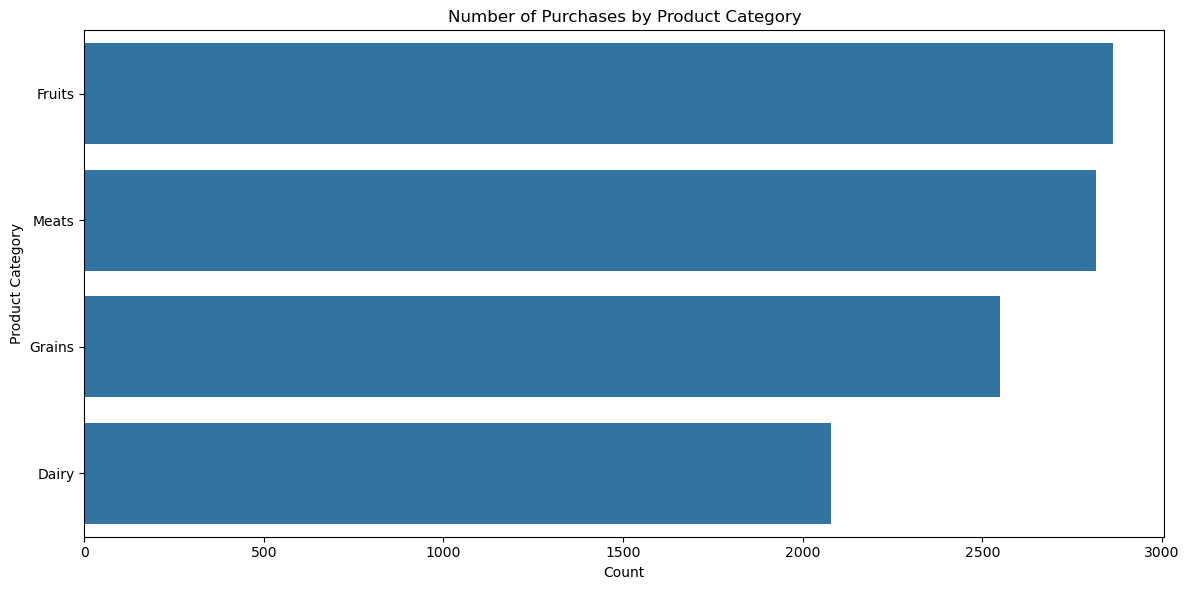

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.countplot(y='category', data=full_df, order=full_df['category'].value_counts().index)
plt.title('Number of Purchases by Product Category')
plt.xlabel('Count')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()


### 4.3 Customer Demographics Overview

We analyze demographic distributions including Gender and Age to understand the customer base.


In [15]:
from datetime import datetime

# Ensure date_of_birth is in datetime format
full_df['date_of_birth'] = pd.to_datetime(full_df['date_of_birth'], errors='coerce')

# Calculate age
current_year = datetime.now().year
full_df['age'] = full_df['date_of_birth'].apply(lambda dob: current_year - dob.year if pd.notnull(dob) else None)


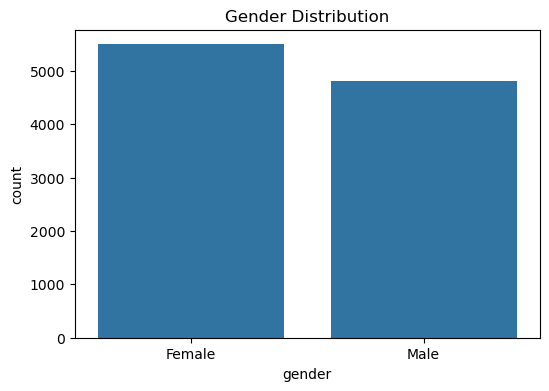

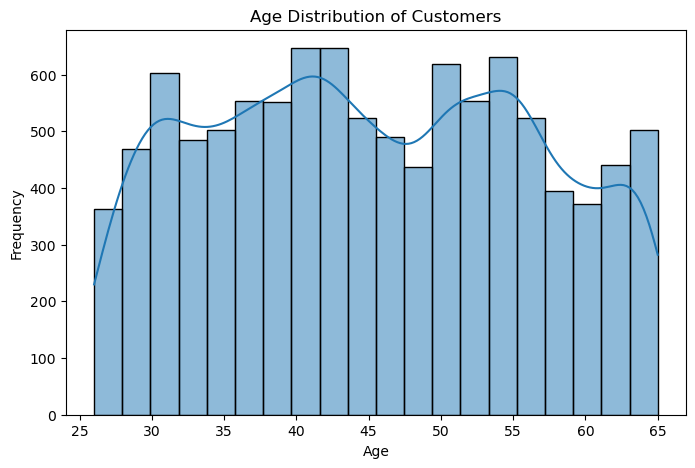

In [16]:
# Gender Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='gender', data=full_df)
plt.title('Gender Distribution')
plt.show()

# Age Distribution
plt.figure(figsize=(8,5))
sns.histplot(full_df['age'].dropna(), kde=True, bins=20)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


### 4.4 Top Customers by Spending

Let’s identify high-value customers by summing the total spending per customer.


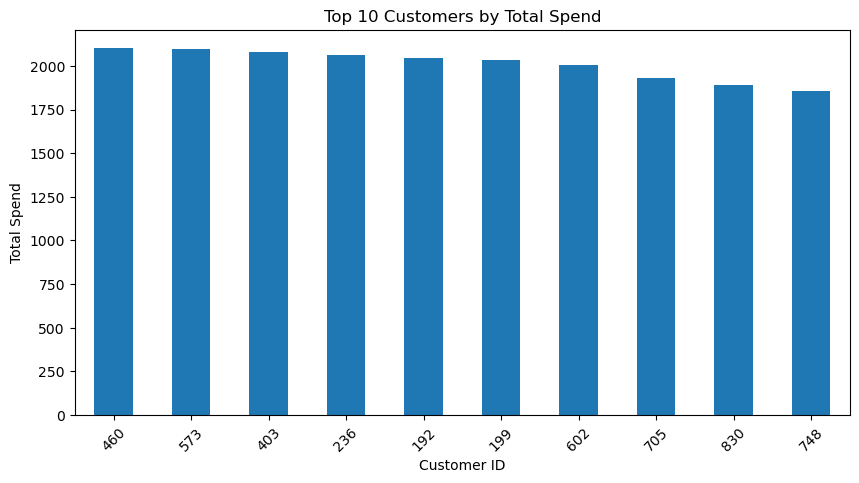

In [18]:
top_spenders = full_df.groupby('customer_id')['total_amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_spenders.plot(kind='bar')
plt.title("Top 10 Customers by Total Spend")
plt.ylabel("Total Spend")
plt.xlabel("Customer ID")
plt.xticks(rotation=45)
plt.show()


### 4.5 Correlation Heatmap

We use a correlation matrix to examine relationships between numerical variables, which may inform feature selection later.


In [20]:
# Create engineered features before plotting
full_df['avg_spent'] = full_df['total_amount'] / full_df['quantity']
full_df['signup_years'] = (pd.to_datetime('today') - pd.to_datetime(full_df['signup_date'])).dt.days // 365


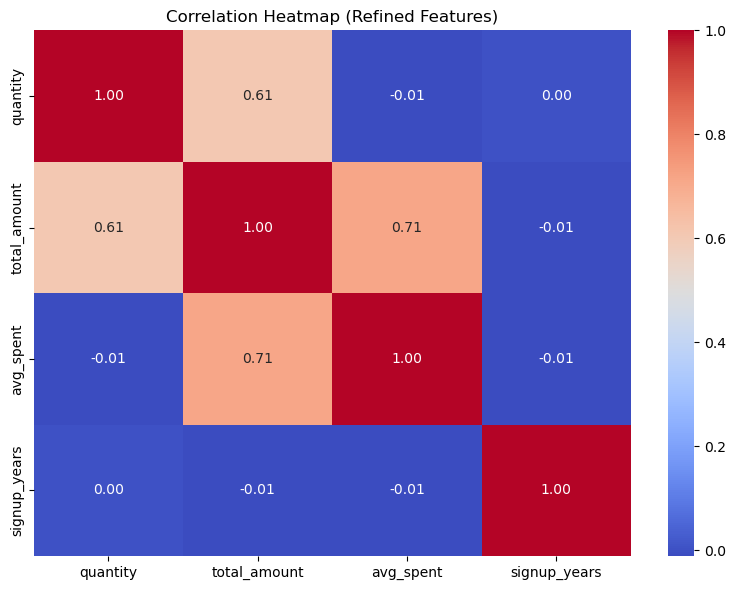

In [21]:
corr_features = ['quantity', 'total_amount', 'avg_spent', 'signup_years']

plt.figure(figsize=(8,6))
sns.heatmap(full_df[corr_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Refined Features)")
plt.tight_layout()
plt.show()


## 4.6 Pie Chart: Purchase Distribution by Gender

This pie chart shows the proportion of purchases made by each gender. It’s useful for understanding customer demographics and targeting strategies.


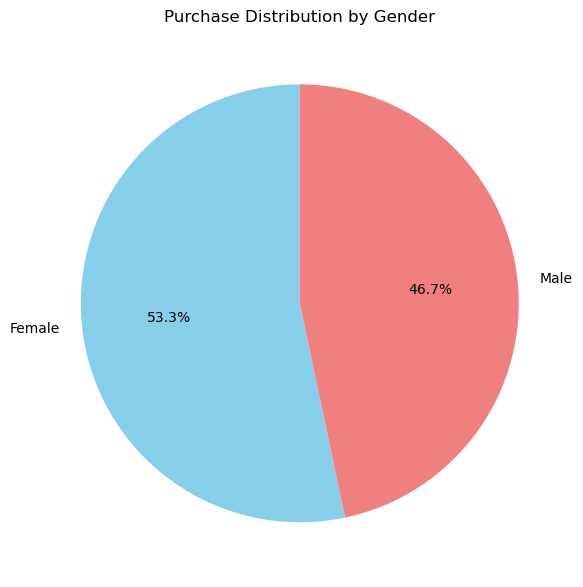

In [23]:
# Count purchases by gender
gender_counts = full_df['gender'].value_counts()

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Purchase Distribution by Gender')
plt.tight_layout()
plt.show()


## 4.6 Boxplot: Total Amount Spent by Gender

This boxplot visualizes spending distribution by gender, allowing us to compare average and outlier behaviors between male and female customers.


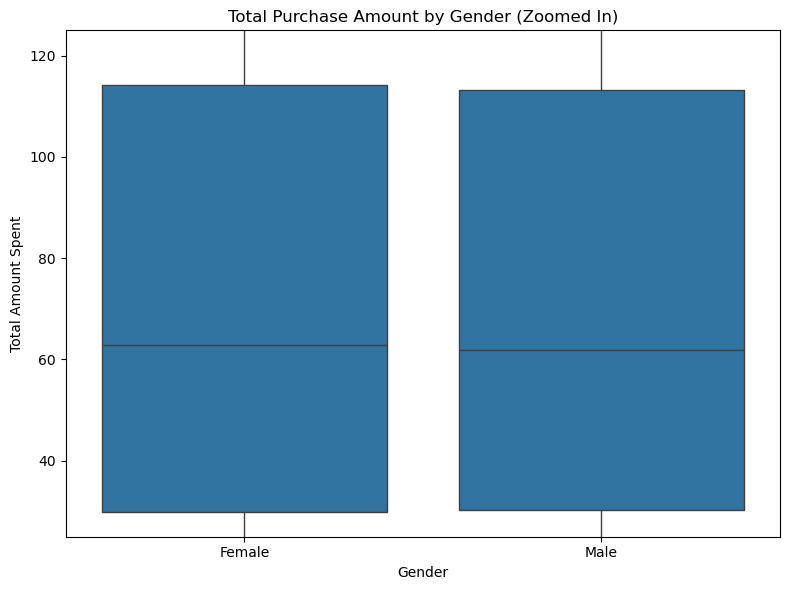

In [25]:
plt.figure(figsize=(8,6))
sns.boxplot(x='gender', y='total_amount', data=full_df)

# 🔍 Zoom in tighter to emphasize mid-range spending
plt.ylim(25, 125)  # You can lower to 80 or raise to 120 based on your dataset

plt.title('Total Purchase Amount by Gender (Zoomed In)')
plt.xlabel('Gender')
plt.ylabel('Total Amount Spent')
plt.tight_layout()
plt.show()



## 4.7 Boxplot: Total Amount Spent by Product Category

This plot helps identify which product categories have the highest variability and average purchase amounts.


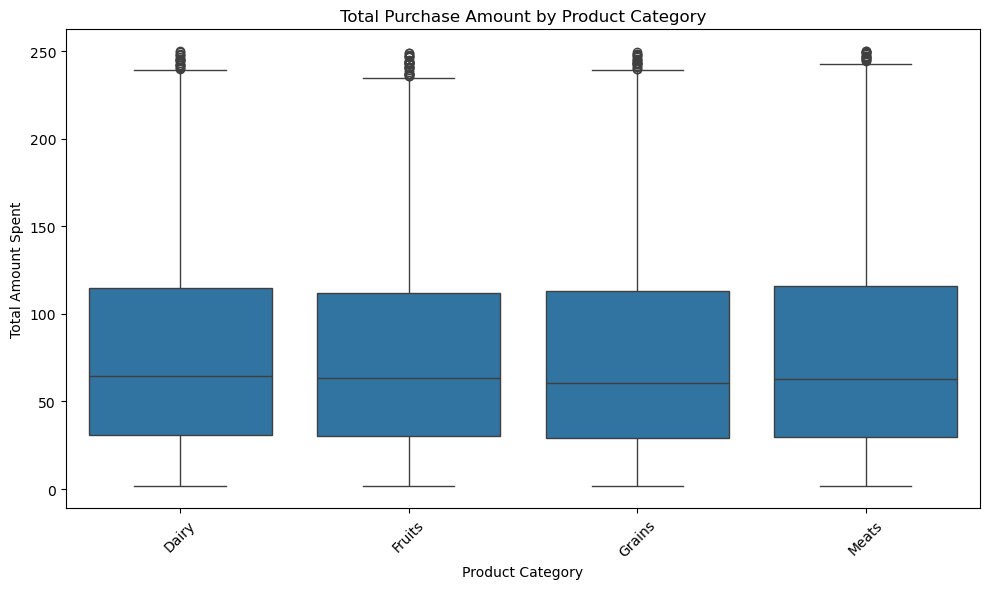

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(x='category', y='total_amount', data=full_df)
plt.title('Total Purchase Amount by Product Category')
plt.xticks(rotation=45)
plt.xlabel('Product Category')
plt.ylabel('Total Amount Spent')
plt.tight_layout()
plt.show()


## 5. Feature Engineering & Target Definition

We engineer useful features and define the target variable for our machine learning task. For this project, we'll predict whether a customer is a high spender or not based on their profile and purchase behavior.


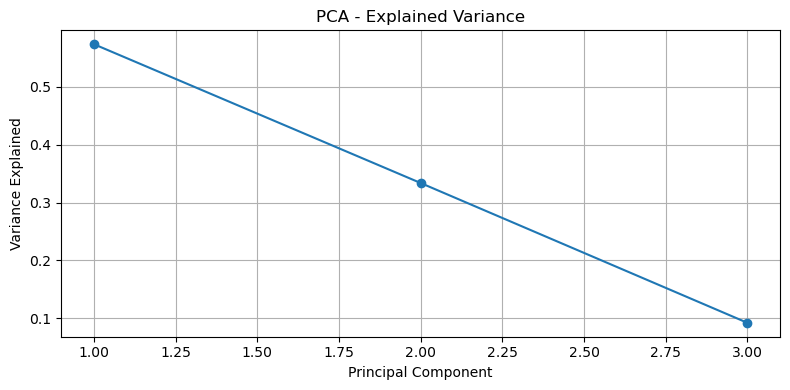


=== Final Model Evaluation Summary ===

                       Model  Accuracy  Precision    Recall  F1 Score
0        Logistic Regression  0.683317   0.711924  0.595850  0.648736
1              Decision Tree  0.661009   0.654492  0.655138  0.654815
2                        SVM  0.725024   0.675612  0.845850  0.751207
3  Tuned Logistic Regression  0.689137   0.706800  0.626482  0.664222


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# STEP 1: Load and prepare the dataset
df = pd.read_csv('merged_data.csv')
target_column = 'total_amount'

# Drop irrelevant/non-numeric columns
df = df.drop(columns=[
    'purchase_id', 'customer_id', 'product_id', 'purchase_date',
    'first_name', 'last_name', 'gender', 'date_of_birth', 'email',
    'phone_number', 'signup_date', 'address', 'city', 'state',
    'zip_code', 'product_name', 'category', 'brand', 'product_description'
], errors='ignore')

# Drop rows with missing target
df = df.dropna(subset=[target_column])

# STEP 2: Create new feature (if applicable)
if 'quantity' in df.columns and 'price_per_unit' in df.columns:
    df['quantity_to_price_ratio'] = df['quantity'] / (df['price_per_unit'] + 1)

# STEP 3: Feature / Target Split
X = df.drop(columns=[target_column]).fillna(0)
y = df[target_column]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# STEP 4: PCA for Dimensionality Reduction
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(8, 4))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o')
plt.title("PCA - Explained Variance")
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.grid(True)
plt.tight_layout()
plt.show()

# Binary classification target (high vs low total_amount)
y_train_class = (y_train > y_train.median())
y_test_class = (y_test > y_train.median())  # keep same threshold for test

# STEP 5: Forward Feature Selection
model = LogisticRegression(max_iter=10000)
n_features = X_train.shape[1]

sfs_forward = SequentialFeatureSelector(model, direction='forward', n_features_to_select=max(1, n_features - 1), cv=5)
sfs_forward.fit(X_train_scaled, y_train_class)
forward_selected = X.columns[sfs_forward.get_support()].tolist()

# STEP 6: Backward Feature Selection
sfs_backward = SequentialFeatureSelector(model, direction='backward', n_features_to_select=max(1, n_features - 1), cv=5)
sfs_backward.fit(X_train_scaled, y_train_class)
backward_selected = X.columns[sfs_backward.get_support()].tolist()

# STEP 7: Lasso Regularization (Feature Shrinking)
lasso = LassoCV(cv=5, random_state=42).fit(X_train_scaled, y_train)
lasso_selected = X.columns[(lasso.coef_ != 0)].tolist()

# STEP 8: Prepare selected features
X_train_sel = X_train[forward_selected]
X_test_sel = X_test[forward_selected]

# STEP 9: Train 3 Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC()
}

results = []
for name, clf in models.items():
    clf.fit(X_train_sel, y_train_class)
    y_pred = clf.predict(X_test_sel)
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test_class, y_pred),
        "Precision": precision_score(y_test_class, y_pred),
        "Recall": recall_score(y_test_class, y_pred),
        "F1 Score": f1_score(y_test_class, y_pred)
    })

# STEP 10: Hyperparameter Tuning (Logistic Regression)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=10000))
])

param_grid = {
    'clf__C': [0.01, 0.1, 1, 10],
    'clf__solver': ['liblinear', 'lbfgs']
}

grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1')
grid.fit(X_train_sel, y_train_class)

best_model = grid.best_estimator_
y_best_pred = best_model.predict(X_test_sel)

results.append({
    "Model": "Tuned Logistic Regression",
    "Accuracy": accuracy_score(y_test_class, y_best_pred),
    "Precision": precision_score(y_test_class, y_best_pred),
    "Recall": recall_score(y_test_class, y_best_pred),
    "F1 Score": f1_score(y_test_class, y_best_pred)
})

# STEP 11: Show Final Model Performance Table
result_df = pd.DataFrame(results)
print("\n=== Final Model Evaluation Summary ===\n")
print(result_df)


## 6. Train-Test Split & Scaling

Split the data into training and testing sets and scale features to standardize them. This ensures the model performs optimally and avoids data leakage.


In [31]:
# Step 1: Load your full dataset
df = pd.read_csv('merged_data.csv')

# Step 2: Drop unnecessary columns including datetime if needed
df = df.drop(columns=[
    'purchase_id', 'customer_id', 'product_id', 'purchase_date',
    'first_name', 'last_name', 'gender', 'date_of_birth', 'email',
    'phone_number', 'signup_date', 'address', 'city', 'state',
    'zip_code', 'product_name', 'category', 'brand', 'product_description'
], errors='ignore')

# Step 3: Define features and target
X = df.drop(columns=['total_amount'])
y = df['total_amount']

# OPTIONAL: Drop datetime columns if still present
X = X.drop(columns=X.select_dtypes(include=['datetime64[ns]']).columns, errors='ignore')

# Step 4: Check datetime types (debugging only)
print(X.dtypes[X.dtypes == 'datetime64[ns]'])


Series([], dtype: object)


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Load your full dataset
full_df = pd.read_csv('merged_data.csv')

# 2. Define HighSpender target
full_df['HighSpender'] = (full_df['total_amount'] > full_df['total_amount'].median()).astype(int)

# 3. Drop datetime or identifier columns
to_drop = [
    'purchase_id', 'customer_id', 'product_id',
    'purchase_date', 'signup_date', 'date_of_birth'
]
df = full_df.drop(columns=to_drop, errors='ignore')

# 4. Separate X and y
X = df.drop(columns=['HighSpender'])
y = df['HighSpender']

# 5. One-hot encode all object (categorical) columns
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# 6. Train/test split (stratify to keep class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

# 7. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

print(" One-hot encoding and scaling complete.")
print("   • X_train shape:", X_train_scaled.shape)
print("   • X_test  shape:", X_test_scaled.shape)


 One-hot encoding and scaling complete.
   • X_train shape: (8246, 3046)
   • X_test  shape: (2062, 3046)


### 7. Insights from SHAP Interpretations

In [34]:
pip install shap matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


Logistic Regression SHAP values shape: (2062, 8)
Mean(|SHAP|) per feature (Logistic):
 [0.00573462 1.31603277 0.00698193 0.0499633  0.00983676 0.00700661
 0.03582146 0.01286497]


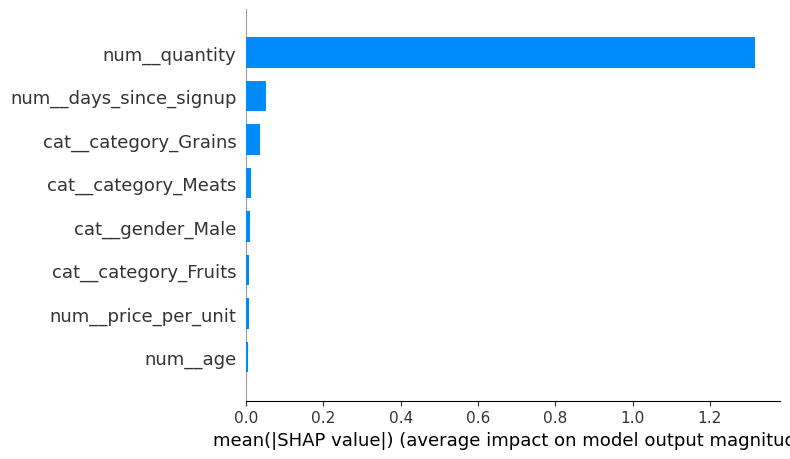

C:\Users\syeda\AppData\Local\Temp\ipykernel_8552\2630452192.py:62: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\syeda\AppData\Local\Temp\ipykernel_8552\2630452192.py:63: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.savefig("shap_logistic.png", dpi=300)
C:\Users\syeda\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


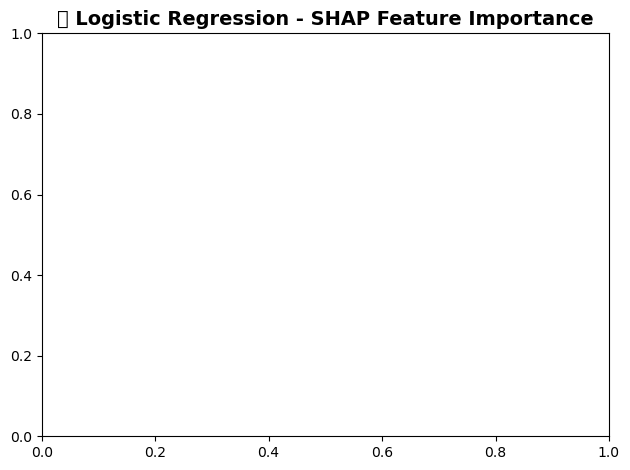

In [70]:
# === 1. Import Libraries ===
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# === 2. Load Dataset ===
df = pd.read_csv("merged_data.csv")

# === 3. Feature Engineering ===
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'], errors='coerce')
df['signup_date'] = pd.to_datetime(df['signup_date'], errors='coerce')
df['age'] = (pd.Timestamp.now() - df['date_of_birth']).dt.days // 365
df['days_since_signup'] = (pd.Timestamp.now() - df['signup_date']).dt.days

# === 4. Target Variable: High Spender ===
df['is_high_spender'] = (df['total_amount'] > df['total_amount'].quantile(0.75)).astype(int)

# === 5. Feature Selection ===
df_model = df[['age', 'quantity', 'price_per_unit', 'gender', 'category', 'days_since_signup', 'is_high_spender']].dropna()
X = df_model.drop('is_high_spender', axis=1)
y = df_model['is_high_spender']

# === 6. Encoding & Preprocessing Pipeline ===
categorical_features = ['gender', 'category']
numeric_features = ['age', 'quantity', 'price_per_unit', 'days_since_signup']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

# === 7. Train/Test Split ===
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# === 8. Transform Data ===
X_train_trans = preprocessor.fit_transform(X_train)
X_test_trans = preprocessor.transform(X_test)
feature_names = preprocessor.get_feature_names_out()

# === 9. Logistic Regression Model ===
log_model = LogisticRegression(max_iter=10000)
log_model.fit(X_train_trans, y_train)

# === 10. SHAP for Logistic Regression ===
explainer_log = shap.LinearExplainer(log_model, X_train_trans, feature_names=feature_names)
shap_values_log = explainer_log(X_test_trans)

# === Diagnostics ===
print("Logistic Regression SHAP values shape:", shap_values_log.values.shape)
print("Mean(|SHAP|) per feature (Logistic):\n", np.abs(shap_values_log.values).mean(axis=0))

# === 11. SHAP Plot: Logistic Regression (summary plot works better) ===
shap.summary_plot(shap_values_log.values, features=X_test_trans, feature_names=feature_names, plot_type="bar")
plt.title("🔍 Logistic Regression - SHAP Feature Importance", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig("shap_logistic.png", dpi=300)
plt.show()
